<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-tensorflow/tf2_7_fmnist_CNN_best_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[DIY]fashion mnist model의 best model을 구하시오
> github의 "py-tensorflow" 폴더에 tf2_7_fmnist_CNN_best.ipynb 파일을 올리시오.

>github의 "py-tensorflow/st-code/model" 폴더에 best model(hdf5 파일)을 올리시오

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## Fashion-MNIST Dataset
- (60000, 28, 28), train
- (10000, 28, 28), test
- grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

### class names
- class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from keras.datasets import fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

Fashion MNIST trainset

#### 트레인데이터에서 무작위로 하나의 패션 선택해서 출력

44899


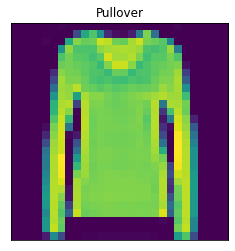

In [ ]:
# Code here!

# display one random image from our training set:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image)
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

#### 대표 패션 그림 출력

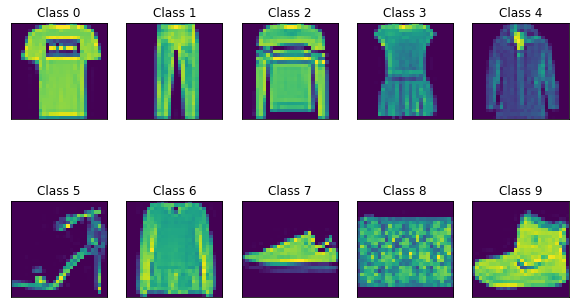

In [ ]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

### [DIY] fMNIST trainset에서 각 패션이 출현하는 첫 인덱스를 이용해서 대표패션를 출력하시오.

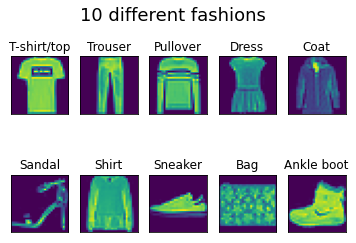

In [ ]:
# Your code here!
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_10 = np.unique(trainy, return_index=True)[1]
images = trainX[num_10]
# fig = plt.figure(figsize=(10,6))
for i in range(len(images)):
    # define subplot
    plt.subplot(2,5,1 + i) #, sharey=False)
    # plot raw pixel data
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle("10 different fashions", fontsize=18)
plt.show()

## Design CNN


###import models, layers, callbacks

>models: Sequential
>layers: Conv2D, MaxPool2D, Flatten
>callbacks: ModelCheckpoint, EarlyStopping

#C2F2

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [ ]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4341 - accuracy: 0.8442
Epoch 2/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2871 - accuracy: 0.8959
Epoch 3/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2417 - accuracy: 0.9113
Epoch 4/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2094 - accuracy: 0.9225
Epoch 5/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1871 - accuracy: 0.9300
Epoch 6/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1642 - accuracy: 0.9380
Epoch 7/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1496 - accuracy: 0.9438
Epoch 8/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1333 - accuracy: 0.9489
Epoch 9/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1189 - accuracy: 0.9548
Epoch 10/20
1875/1875 [==============================] - 69s 37m

In [ ]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0333 - val_accuracy: 0.9937
Epoch 2/500
1390/1875 [=====================>........] - ETA: 18s - loss: 0.0046 - accuracy: 0.9984

In [ ]:

c2f2.evaluate(X_test, y_test, batch_size =32)

NameError: ignored



---



---



##Graph of loss and accuracy

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 42 
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:

vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [ ]:
np.argmax(np.array(vacc_list))

In [ ]:

vacc_list[np.argmax(np.array(vacc_list))]

In [ ]:

plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center') #가장높은부분을 빨간색으로 표시
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')

#[DIY] C2F3의 best model을 구하시오.

In [ ]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
c2f3.summary()

In [ ]:
# Your code here!!!

cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50 # 과제할 땐 50으로 설정


In [ ]:
# Train CNN model
# Find and save the best model.
hist = c2f3.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

In [ ]:
c2f3.evaluate(X_test, y_test, batch_size =32)


##Graph of loss and accuracy

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 80
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [ ]:

np.argmax(np.array(vacc_list))

In [ ]:
vacc_list[np.argmax(np.array(vacc_list))]


In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')

###최적화된 모형 불러와서 이용

In [ ]:

from keras.models import load_model

model = load_model('mnist_c2f3_best_weights.030-0.9937.hdf5')
model.evaluate(X_test, y_test, batch_size=32)